In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
def wrangle(filepath):
  df = pd.read_csv(filepath)
  df[['Gender', 'Operating Status', 'Founded Date',
      'Company Type', 'Success', 'Founder']] = (
      df[['Gender', 'Operating Status', 'Founded Date', 'Company Type',
          'Success', 'Founder']].astype('str')
  )
  df['Closed Date'] = df['Closed Date'].astype('str').replace('0', 'Not closed')
  df.drop(columns=['Bio'], inplace=True)

  return df

In [3]:
df = wrangle("/content/drive/MyDrive/Datasets/dataset2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Full Name                        18361 non-null  object
 1   Primary Job Title                18361 non-null  object
 2   Gender                           18361 non-null  object
 3   Number of News Articles          18361 non-null  int64 
 4   Number of Founded Organizations  18361 non-null  int64 
 5   Number of Portfolio Companies    18361 non-null  int64 
 6   Number of Investments_x          18361 non-null  int64 
 7   Number of Partner Investments    18361 non-null  int64 
 8   Number of Lead Investments_x     18361 non-null  int64 
 9   Number of Exits_x                18361 non-null  int64 
 10  Number of Events_x               18361 non-null  int64 
 11  Categories                       18361 non-null  object
 12  Headquarters Location           

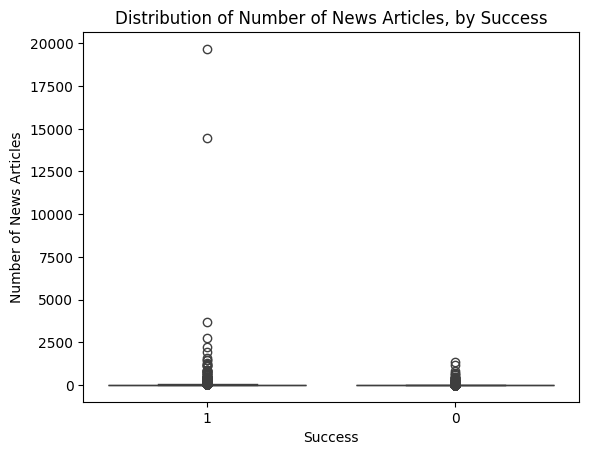

In [4]:
sns.boxplot(
    y='Number of News Articles',
    x='Success', data=df
)
plt.title('Distribution of Number of News Articles, by Success');
plt.savefig('NewsartbySuccess.png')

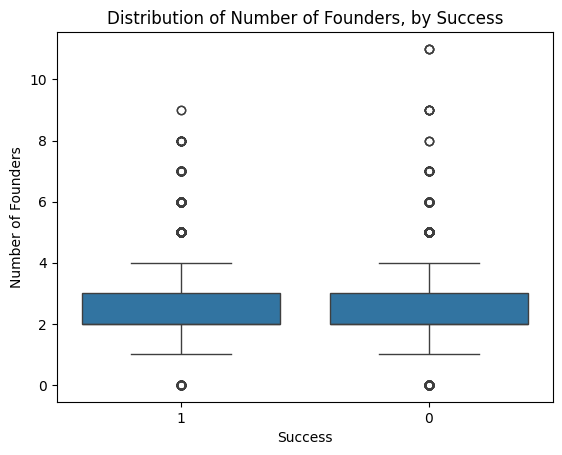

In [5]:
sns.boxplot(
    y='Number of Founders',
    x='Success', data=df
)
plt.title('Distribution of Number of Founders, by Success');
#plt.savefig('FoundersbySuccess.png')

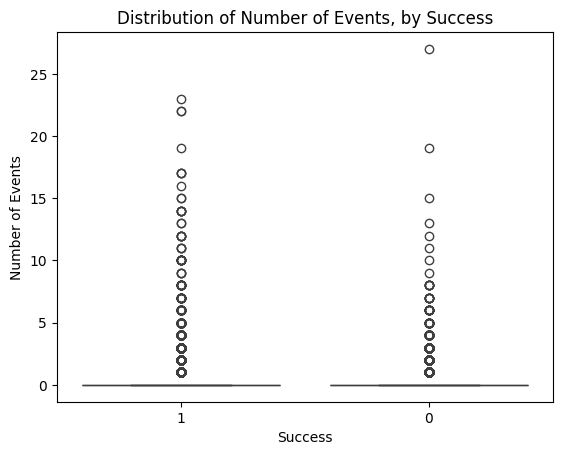

In [6]:
sns.boxplot(
    y='Number of Events_x',
    x='Success', data=df
)
plt.ylabel('Number of Events')
plt.title('Distribution of Number of Events, by Success');
#plt.savefig('EventsbySuccess.png')

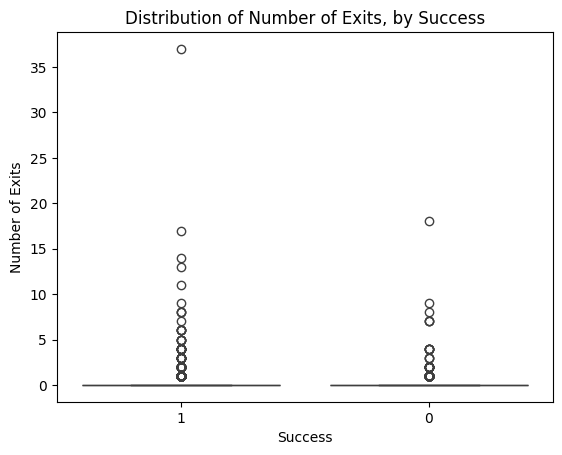

In [7]:
sns.boxplot(
    y='Number of Exits_x',
    x='Success', data=df
)
plt.ylabel('Number of Exits')
plt.title('Distribution of Number of Exits, by Success');
#plt.savefig('ExitsbySuccess.png')

In [8]:
# Filter out rows with Founded Date = '0'
df = df[df['Founded Date'] != '0']

# Convert to datetime and extract year
df['Founded Date'] = pd.to_datetime(df['Founded Date'])
df['Founded Year'] = df['Founded Date'].dt.year

# Filter by success
failed = df[df['Success'] == '0']
successful = df[df['Success'] == '1']

# Group and count
failed_counts = failed.groupby('Founded Year')['Success'].count().tail(20)
success_counts = successful.groupby('Founded Year')['Success'].count().tail(20)

# Plot
fig = px.bar(
    x=failed_counts.index,
    y=failed_counts,
    title='Trend of Failed Startups by Founded Date'
)

fig.update_layout(xaxis_title='Founded Date', yaxis_title='Count')
fig.show()

<ipython-input-8-bde99b2f7c96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Founded Date'] = pd.to_datetime(df['Founded Date'])
<ipython-input-8-bde99b2f7c96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Founded Year'] = df['Founded Date'].dt.year
